1. Data Loading and Initial Exploration

We begin by loading the Iris dataset and performing initial exploration. We are also implimenting logging for security and maintainence purposes.

In [ ]:
# Configure logging
import logging

logging.basicConfig(filename='application.log', level=logging.INFO,
                    format='%(asctime)s:%(levelname)s:%(message)s')

logging.info("Iris dataset loaded successfully.")


In [ ]:
# Import necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings

# Load the dataset
df = pd.read_csv('Iris.csv')

# Display the first few rows
df.head()

logging.info("Dataframe previewed and contains shape: %s", df.shape)



,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


2. Data Cleaning, Feature Engineering, and Preprocessing

We perform data cleaning and feature engineering, including renaming columns and creating a new feature petal_area.

In [ ]:
# Data Cleaning and Feature Engineering

# Remove the 'Id' column
df = df.drop('Id', axis=1)

# Rename columns for consistency
df = df.rename(columns={
    'SepalLengthCm': 'sepal_length',
    'SepalWidthCm': 'sepal_width',
    'PetalLengthCm': 'petal_length',
    'PetalWidthCm': 'petal_width',
    'Species': 'species'
})

# Create a new feature 'petal_area'
df['petal_area'] = df['petal_length'] * df['petal_width']

# Display the updated dataframe
df.head()


,sepal_length,sepal_width,petal_length,petal_width,species,petal_area
0,5.1,3.5,1.4,0.2,Iris-setosa,0.28
1,4.9,3.0,1.4,0.2,Iris-setosa,0.28
2,4.7,3.2,1.3,0.2,Iris-setosa,0.26
3,4.6,3.1,1.5,0.2,Iris-setosa,0.30
4,5.0,3.6,1.4,0.2,Iris-setosa,0.28


3. Exploratory Data Analysis (EDA)

We perform exploratory data analysis to understand the dataset.

In [ ]:
# Statistical summary
df.describe()


,sepal_length,sepal_width,petal_length,petal_width,petal_area
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667,5.793133
std,0.828066,0.433594,1.764420,0.763161,4.713499
min,4.300000,2.000000,1.000000,0.100000,0.110000
25%,5.100000,2.800000,1.600000,0.300000,0.420000
50%,5.800000,3.000000,4.350000,1.300000,5.615000
75%,6.400000,3.300000,5.100000,1.800000,9.690000
max,7.900000,4.400000,6.900000,2.500000,15.870000


In [ ]:
# added this to hide a warning to remove visual clutter. Can delete or comment out this cell to repopulate warning about needing to update seaborn and pandas.
warnings.filterwarnings("ignore", category=FutureWarning)


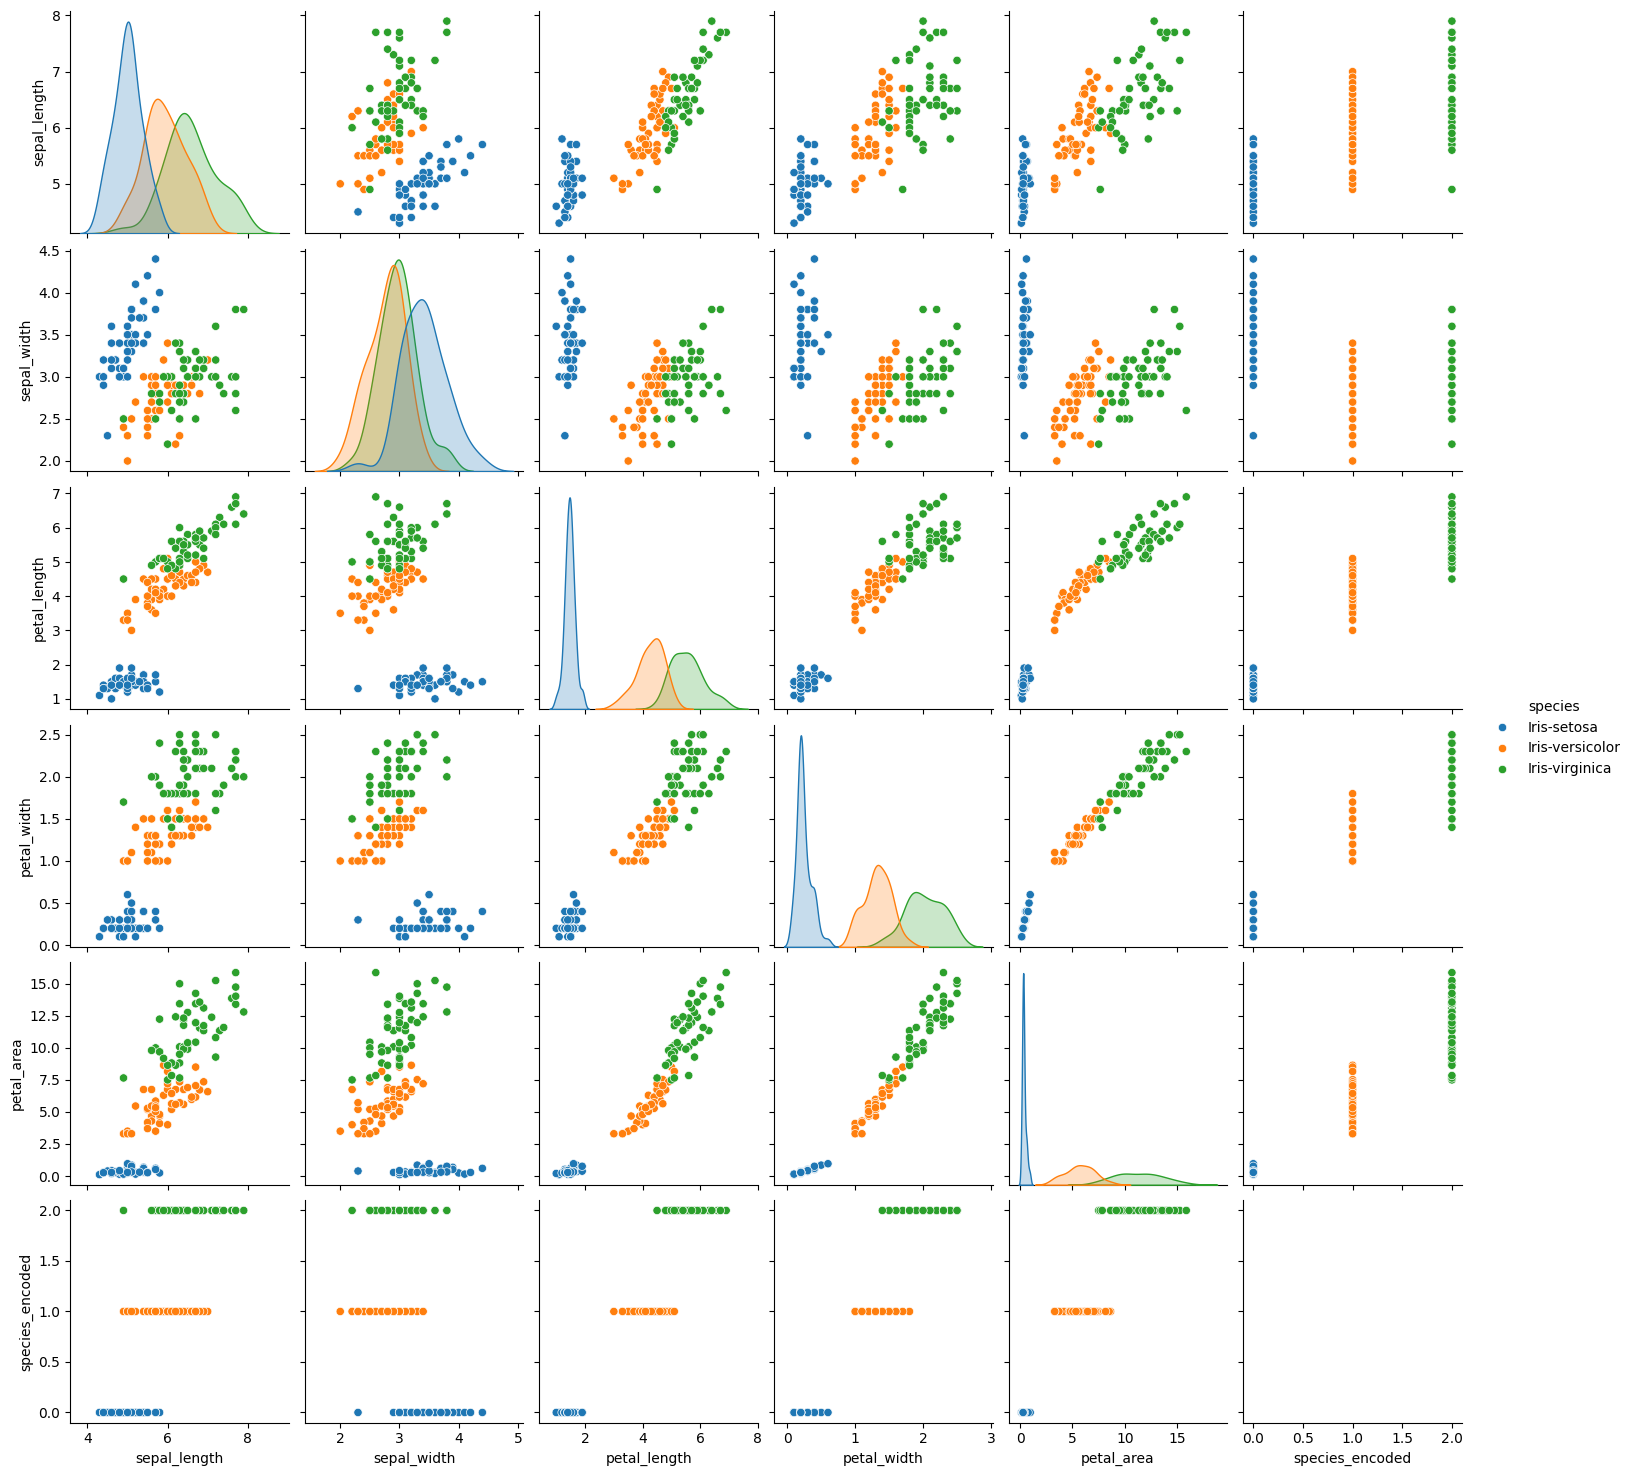

In [ ]:
# Pairplot to visualize relationships between variables
sns.pairplot(df, hue='species')
plt.show()


4. Descriptive Method: Principal Component Analysis (PCA)

We use Principal Component Analysis (PCA) as a descriptive method to reduce dimensionality and visualize the data.

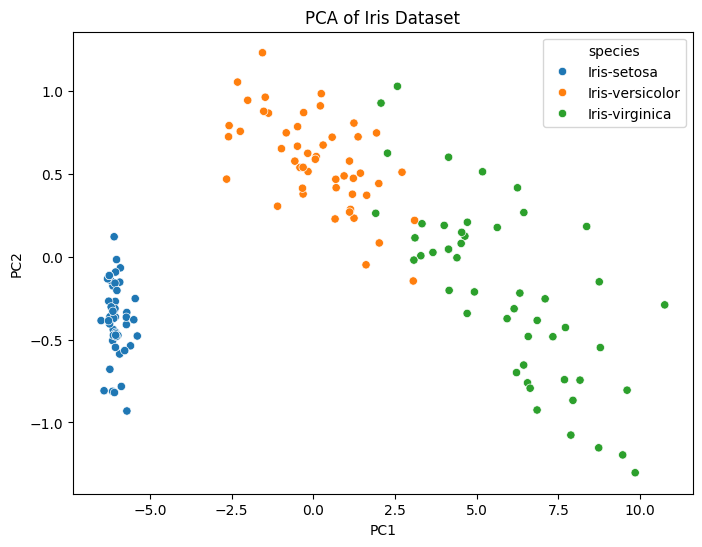

In [ ]:
from sklearn.decomposition import PCA

# Prepare features
features = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'petal_area']
X = df[features]

# Apply PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

# Create a new dataframe with PCA components
df_pca = pd.DataFrame(X_pca, columns=['PC1', 'PC2'])
df_pca['species'] = df['species']

# Plot the PCA components
plt.figure(figsize=(8,6))
sns.scatterplot(data=df_pca, x='PC1', y='PC2', hue='species')
plt.title('PCA of Iris Dataset')
plt.show()


5. Predictive Method: Logistic Regression

We use logistic regression as the predictive method to classify iris species based on measurements. We impliment joblib to save the model and label encoders for maintainence purposes.

In [ ]:
# Import necessary libraries
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

# Encode the target variable
label_encoder = LabelEncoder()
df['species_encoded'] = label_encoder.fit_transform(df['species'])

# Prepare features and target variable
X = df[features]
y = df['species_encoded']

# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y)

# Initialize and train the logistic regression model
model = LogisticRegression(max_iter=200)
model.fit(X_train, y_train)


LogisticRegression(max_iter=200)

In [ ]:
# Import joblib
import joblib

# Save the trained model and label encoder
joblib.dump(model, 'iris_model.joblib')
joblib.dump(label_encoder, 'label_encoder.joblib')


['label_encoder.joblib']

6. Model Evaluation

We evaluate the model using accuracy score, confusion matrix, and classification report.

In [ ]:
# Import necessary libraries
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Make predictions
y_pred = model.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy * 100:.2f}%')


Accuracy: 96.67%


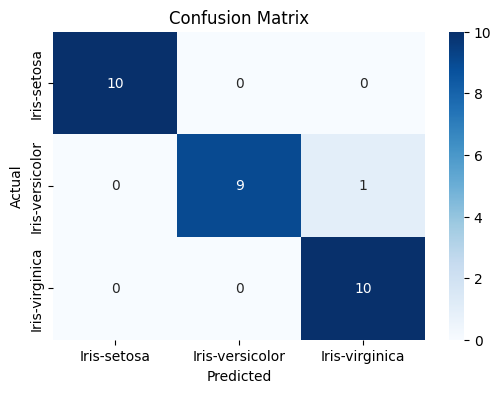

In [ ]:
# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=label_encoder.classes_,
            yticklabels=label_encoder.classes_)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


In [ ]:
# Classification Report
report = classification_report(y_test, y_pred, target_names=label_encoder.classes_)
print(report)


                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        10
Iris-versicolor       1.00      0.90      0.95        10
 Iris-virginica       0.91      1.00      0.95        10

       accuracy                           0.97        30
      macro avg       0.97      0.97      0.97        30
   weighted avg       0.97      0.97      0.97        30



7. Data Visualization Functionalities for Data Exploration and Inspection

We create various plots to visualize the data.

Histogram

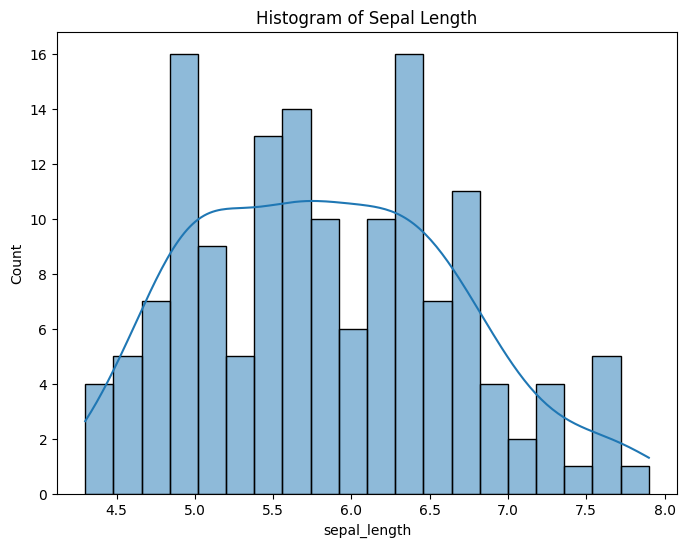

In [ ]:
# Histogram of sepal length
plt.figure(figsize=(8,6))
sns.histplot(df['sepal_length'], bins=20, kde=True)
plt.title('Histogram of Sepal Length')
plt.show()


Boxplot

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


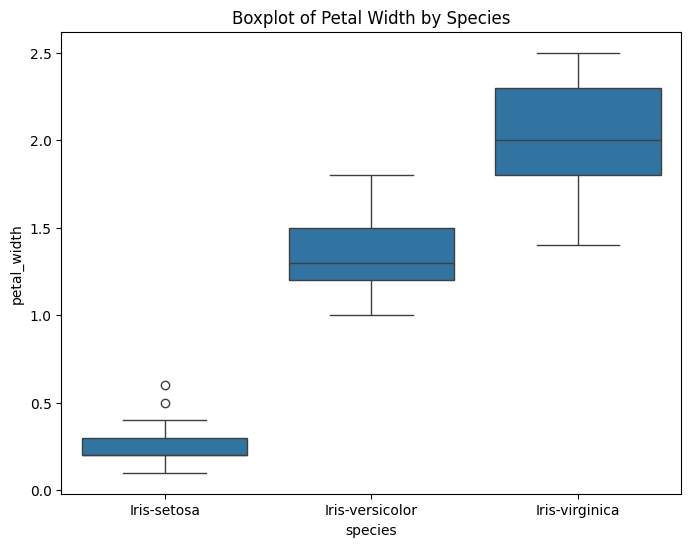

In [ ]:
# Boxplot of petal width by species
plt.figure(figsize=(8,6))
sns.boxplot(x='species', y='petal_width', data=df)
plt.title('Boxplot of Petal Width by Species')
plt.show()


Correlation Heatmap

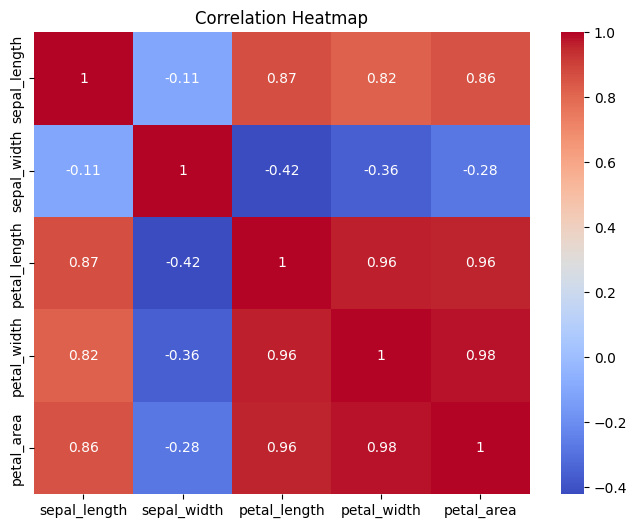

In [ ]:
# Correlation Heatmap
plt.figure(figsize=(8,6))
corr_matrix = df[features].corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()


8. Interactive Dashboard with Visualizations and Prediction

We will create an interactive dashboard using ipywidgets that includes three types of visualizations: scatter plot, histogram, and PCA plot. It also includes the interactive prediction section with decision support functionality.

In [ ]:
from ipywidgets import widgets, interact, interactive, HBox, VBox, Tab
from IPython.display import display, clear_output


In [ ]:
def provide_recommendation(species):
    recommendations = {
        'Iris-setosa': 'Iris-setosa thrives in well-drained soil and partial shade.',
        'Iris-versicolor': 'Iris-versicolor prefers moist, acidic soil and full sun.',
        'Iris-virginica': 'Iris-virginica grows best in wet conditions, like marshes or riverbanks.'
    }
    return recommendations.get(species, 'No recommendation available.')


In [ ]:
# Widget for species selection
species_dropdown = widgets.Dropdown(
    options=df['species'].unique().tolist(),
    value='Iris-setosa',
    description='Species:',
)

# Function to update scatter plot
def update_scatter_plot(species):
    df_species = df[df['species'] == species]
    plt.figure(figsize=(8,6))
    sns.scatterplot(data=df_species, x='sepal_length', y='petal_length', hue='species')
    plt.title(f'Scatter Plot for {species}')
    plt.show()

# Create interactive scatter plot
scatter_plot = interactive(update_scatter_plot, species=species_dropdown)


In [ ]:
# Widgets for feature selection and bins
feature_dropdown = widgets.Dropdown(
    options=features,
    value='sepal_length',
    description='Feature:',
)

bins_slider = widgets.IntSlider(
    value=10,
    min=5,
    max=50,
    step=1,
    description='Bins:',
)

# Function to update histogram
def update_histogram(feature, bins):
    plt.figure(figsize=(8,6))
    sns.histplot(df[feature], bins=bins, kde=True)
    plt.title(f"Histogram of {feature.replace('_', ' ').capitalize()}")
    plt.show()

# Create interactive histogram
histogram_plot = interactive(update_histogram, feature=feature_dropdown, bins=bins_slider)


In [ ]:
# Widget for number of PCA components
components_slider = widgets.IntSlider(
    value=2,
    min=2,
    max=3,
    step=1,
    description='PCA Components:',
)

# Function to update PCA plot
def update_pca_plot(n_components):
    pca = PCA(n_components=n_components)
    X_pca = pca.fit_transform(X)
    df_pca = pd.DataFrame(X_pca, columns=[f'PC{i+1}' for i in range(n_components)])
    df_pca['species'] = df['species']

    if n_components == 2:
        plt.figure(figsize=(8,6))
        sns.scatterplot(data=df_pca, x='PC1', y='PC2', hue='species')
        plt.title('PCA Plot with 2 Components')
        plt.show()
    elif n_components == 3:
        from mpl_toolkits.mplot3d import Axes3D
        fig = plt.figure(figsize=(8,6))
        ax = fig.add_subplot(111, projection='3d')
        scatter = ax.scatter(df_pca['PC1'], df_pca['PC2'], df_pca['PC3'],
                             c=df_pca['species'].astype('category').cat.codes, cmap='viridis')
        ax.set_xlabel('PC1')
        ax.set_ylabel('PC2')
        ax.set_zlabel('PC3')
        plt.title('PCA Plot with 3 Components')
        plt.show()

# Create interactive PCA plot
pca_plot = interactive(update_pca_plot, n_components=components_slider)


In [ ]:
# Widgets for input features
sepal_length_widget = widgets.FloatSlider(
    value=5.0,
    min=4.0,
    max=8.0,
    step=0.1,
    description='Sepal Length:',
)

sepal_width_widget = widgets.FloatSlider(
    value=3.0,
    min=2.0,
    max=4.5,
    step=0.1,
    description='Sepal Width:',
)

petal_length_widget = widgets.FloatSlider(
    value=4.0,
    min=1.0,
    max=7.0,
    step=0.1,
    description='Petal Length:',
)

petal_width_widget = widgets.FloatSlider(
    value=1.2,
    min=0.1,
    max=2.5,
    step=0.1,
    description='Petal Width:',
)

# Button to trigger prediction
predict_button = widgets.Button(
    description='Predict Species',
    button_style='success',
)

# Output area
prediction_output = widgets.Output()


# Function to make prediction
def on_predict_button_clicked(b):
    with prediction_output:
        clear_output()
        sepal_length = sepal_length_widget.value
        sepal_width = sepal_width_widget.value
        petal_length = petal_length_widget.value
        petal_width = petal_width_widget.value
        petal_area = petal_length * petal_width


        # Input validation
        if (sepal_length <= 0 or sepal_width <= 0 or
            petal_length <= 0 or petal_width <= 0 or petal_area <= 0):
            print("All measurements must be positive numbers.")
            logging.warning('Invalid input detected.')
            return


        # Prepare input data
        input_data = np.array([[sepal_length, sepal_width, petal_length, petal_width, petal_area]])

        # Suppress the specific warning from scikit-learn
        with warnings.catch_warnings():
            warnings.filterwarnings(
                "ignore",
                message="X does not have valid feature names, but LogisticRegression was fitted with feature names"
            )
            # Make prediction
            prediction = model.predict(input_data)
            species = label_encoder.inverse_transform(prediction)[0]

        # Log the prediction
        logging.info(f'Prediction made: {species}')

        # Get recommendation
        recommendation = provide_recommendation(species)

        # Display the prediction and recommendation
        print(f"**Predicted Species:** {species}")
        print(f"**Recommendation:** {recommendation}")



# Attach the function to the button
predict_button.on_click(on_predict_button_clicked)

# Prediction interface
prediction_interface = VBox([
    sepal_length_widget,
    sepal_width_widget,
    petal_length_widget,
    petal_width_widget,
    predict_button,
    prediction_output
])


In [ ]:
# Create tab layout
tab = Tab()

# Assign content to each tab
tab.children = [
    VBox([species_dropdown, scatter_plot.children[-1]]),        # Scatter Plot
    VBox([feature_dropdown, bins_slider, histogram_plot.children[-1]]),  # Histogram
    VBox([components_slider, pca_plot.children[-1]]),           # PCA Plot
    VBox([prediction_interface])                                # Prediction
]

# Set titles for each tab
tab.set_title(0, 'Scatter Plot')
tab.set_title(1, 'Histogram')
tab.set_title(2, 'PCA Plot')
tab.set_title(3, 'Prediction')

# Display the tabbed dashboard
display(tab)
